In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis

First we try to understand what kind of data we have, including how many rows, features and a first look into the distribution of our target variable. For features descriptions we used the official data dictionary from https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [2]:
df = pd.read_csv(r'../data/raw/diabetic_readmission_data.csv')
print(f'The number of rows in the data is {df.shape[0]}')
print(f'The number of columns is {df.shape[1]}')

The number of rows in the data is 101766
The number of columns is 50


The next step is to understand the data types we are dealing with

In [3]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

encounter_id and patient_nbr are identifiers so we set them as strings.
admission_type_id, discharge_disposition_id and admission_source_id are actually categorical features
Source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [4]:
df[['encounter_id', 'patient_nbr']] = df[['encounter_id', 'patient_nbr']].astype(str)
print(f'The number of encounters in the data is {df["encounter_id"].nunique()}')
print(f'The number of patients in the data is {df["patient_nbr"].nunique()}')

The number of encounters in the data is 101766
The number of patients in the data is 71518


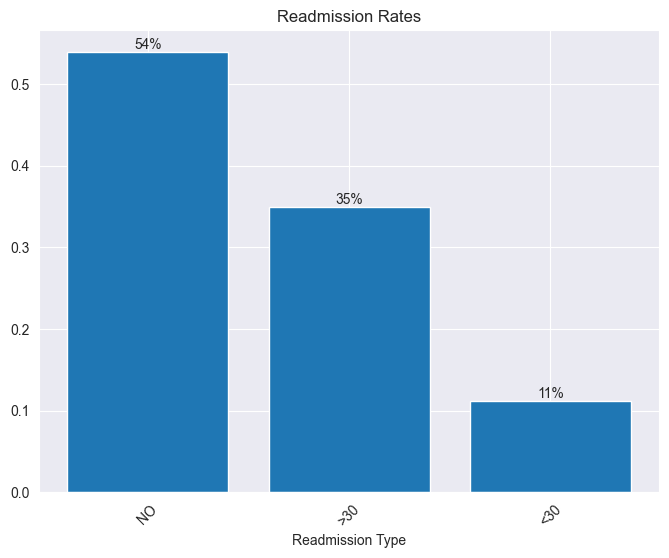

In [5]:
target_distribution= df['readmitted'].value_counts(normalize=True)
#Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(target_distribution.index, target_distribution.values)

# Adding value labels on each bar, formatted as percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval * 100)}%', ha='center', va='bottom')

plt.title('Readmission Rates')
plt.xlabel('Readmission Type')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

## Descriptive Statistics
Descriptive statistics of the dataset give us sense of how the data behaves.

In [6]:
df.describe(include = 'all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101766,71518,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,2278392,88785891,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,1,40,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Numerical Columns Distributions

In [7]:
num_df = df.select_dtypes(include = ['number'])

#Removing already encoded columns from numeric column types analyses
num_df.drop(['admission_type_id',
             'discharge_disposition_id',
             'admission_source_id'], axis = 1,inplace = True)
num_df.shape

(101766, 8)

In order to improve our sense of numeric features we plot histograms

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


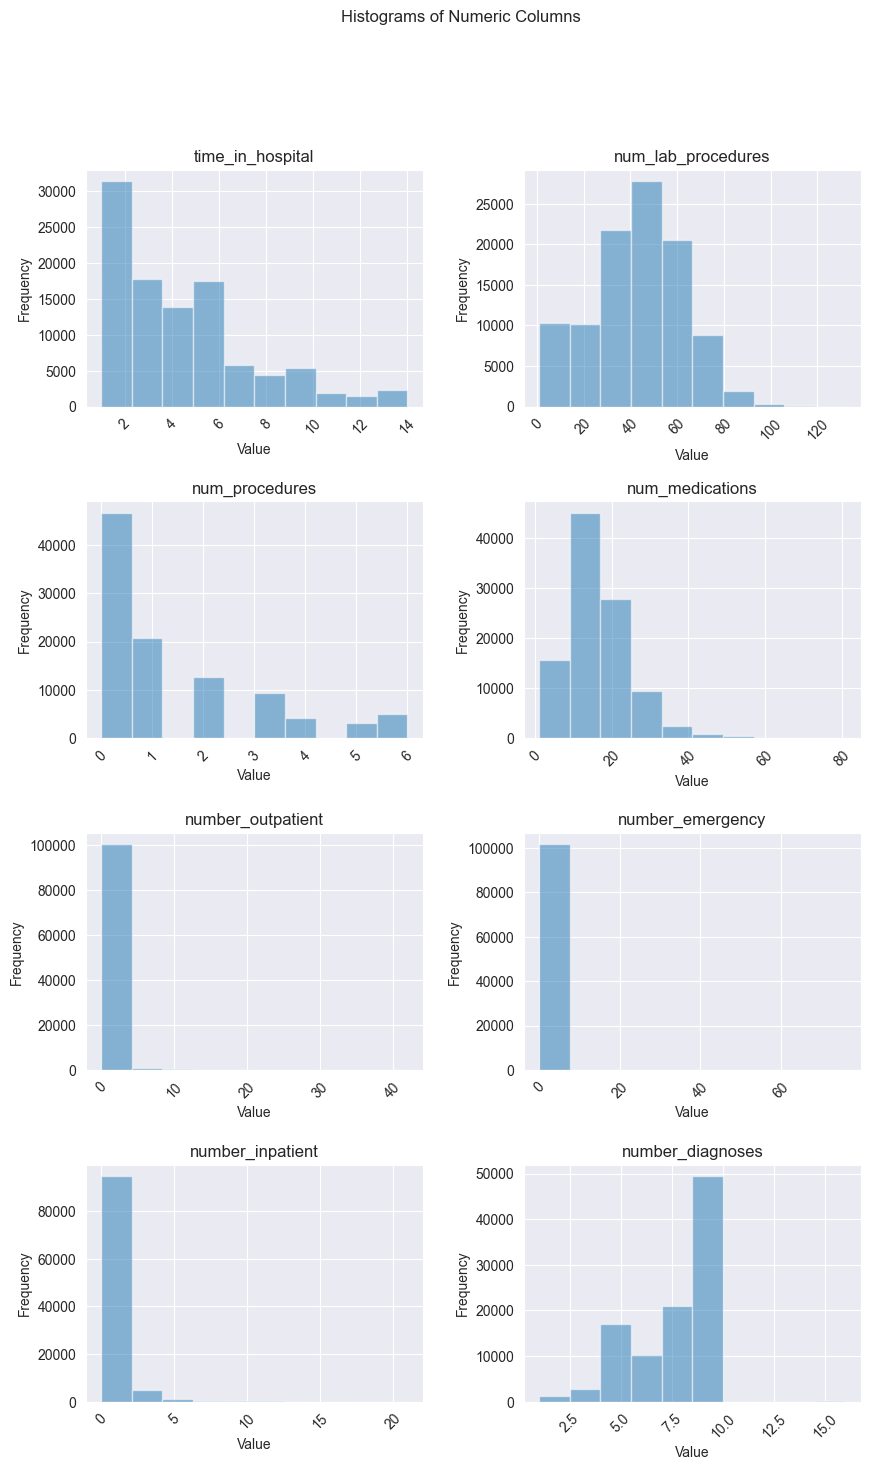

In [8]:
print(num_df.columns)
num_columns = num_df.columns
n_cols = 2 
n_rows = (len(num_columns) + 1) // n_cols 

plt.figure(figsize=(10, 4 * n_rows)) 
for i, column in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    num_df[column].hist(alpha=0.5, bins=10)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Histograms of Numeric Columns')
plt.show()

We start looking for relations between these columns and our target "readmitted" as well:

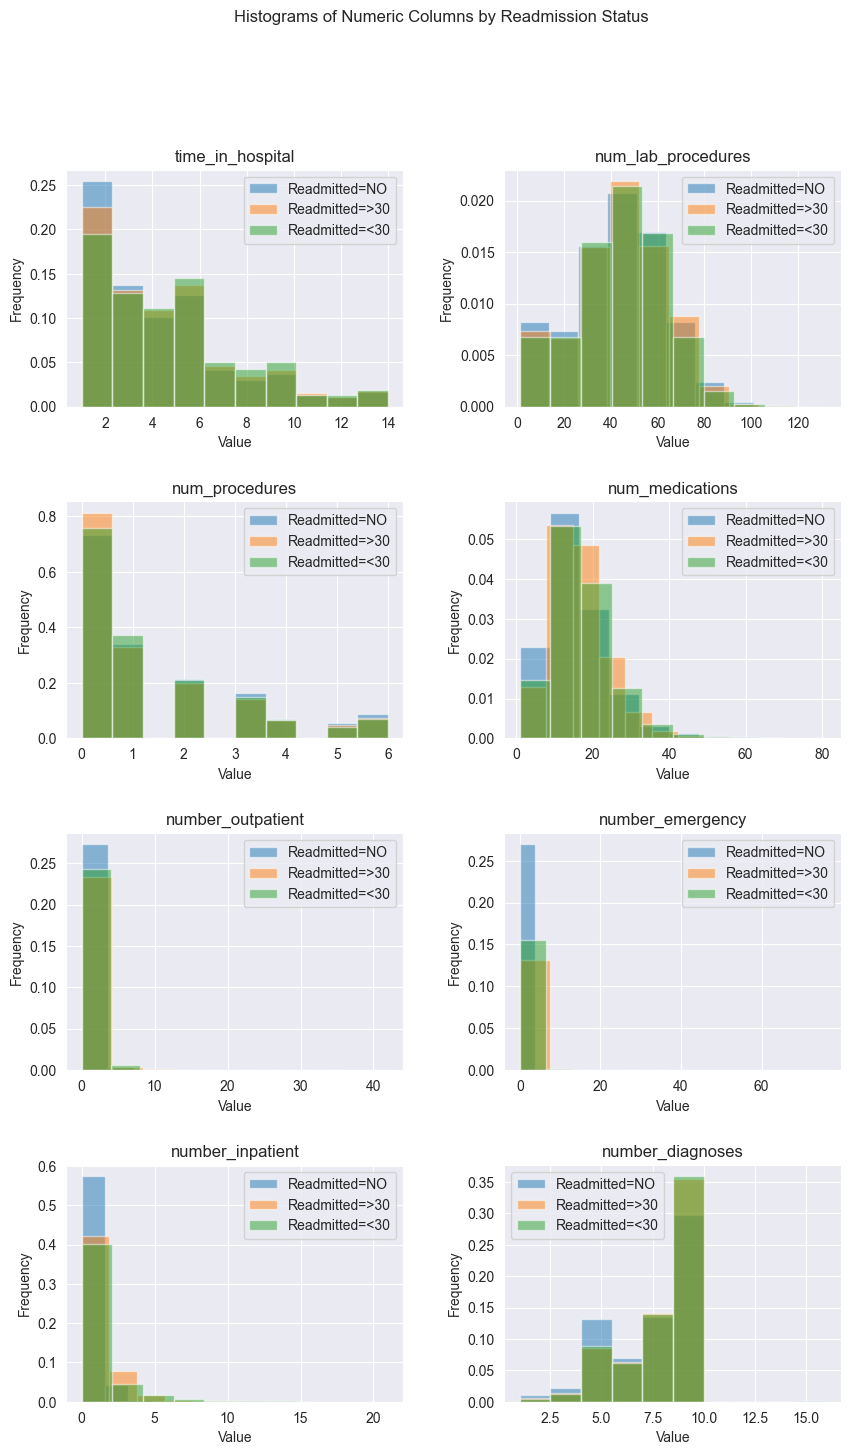

In [9]:
#Plot histograms differentiating by target label
num_columns = num_df.columns  # Exclude the target column 'readmitted'
n_cols = 2
n_rows = len(num_columns) // n_cols if len(num_columns) % n_cols == 0 else (len(num_columns) // n_cols) + 1

plt.figure(figsize=(10, 4 * n_rows))

for i, column in enumerate(num_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    # Plot histograms for each category of the 'readmitted' column
    for readmitted_status in df['readmitted'].unique():
        subset = df[df['readmitted'] == readmitted_status]
        subset[column].hist(alpha=0.5, bins=10, density=True,label=f'Readmitted={readmitted_status}')
    
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Histograms of Numeric Columns by Readmission Status')
plt.show()

## Categorical columns distributions
Here we analyze the distinct values that categorical features can take and its weight within the column

In [10]:
cat_columns = ['race',
               'gender',
               'age',
               'weight',
               'admission_type_id',
               'discharge_disposition_id',
               'admission_source_id',
               'payer_code',
               'medical_specialty',
               'max_glu_serum',
               'A1Cresult',
               'change',
               'diabetesMed']

for i in cat_columns:
    print(df[i].value_counts(normalize = True))

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64
age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64
weight
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: proportion, dtype: float64
admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: proportion, dtype: float64


Now we try to spot visually possible relations between some of the categorical features with the readmission rates:

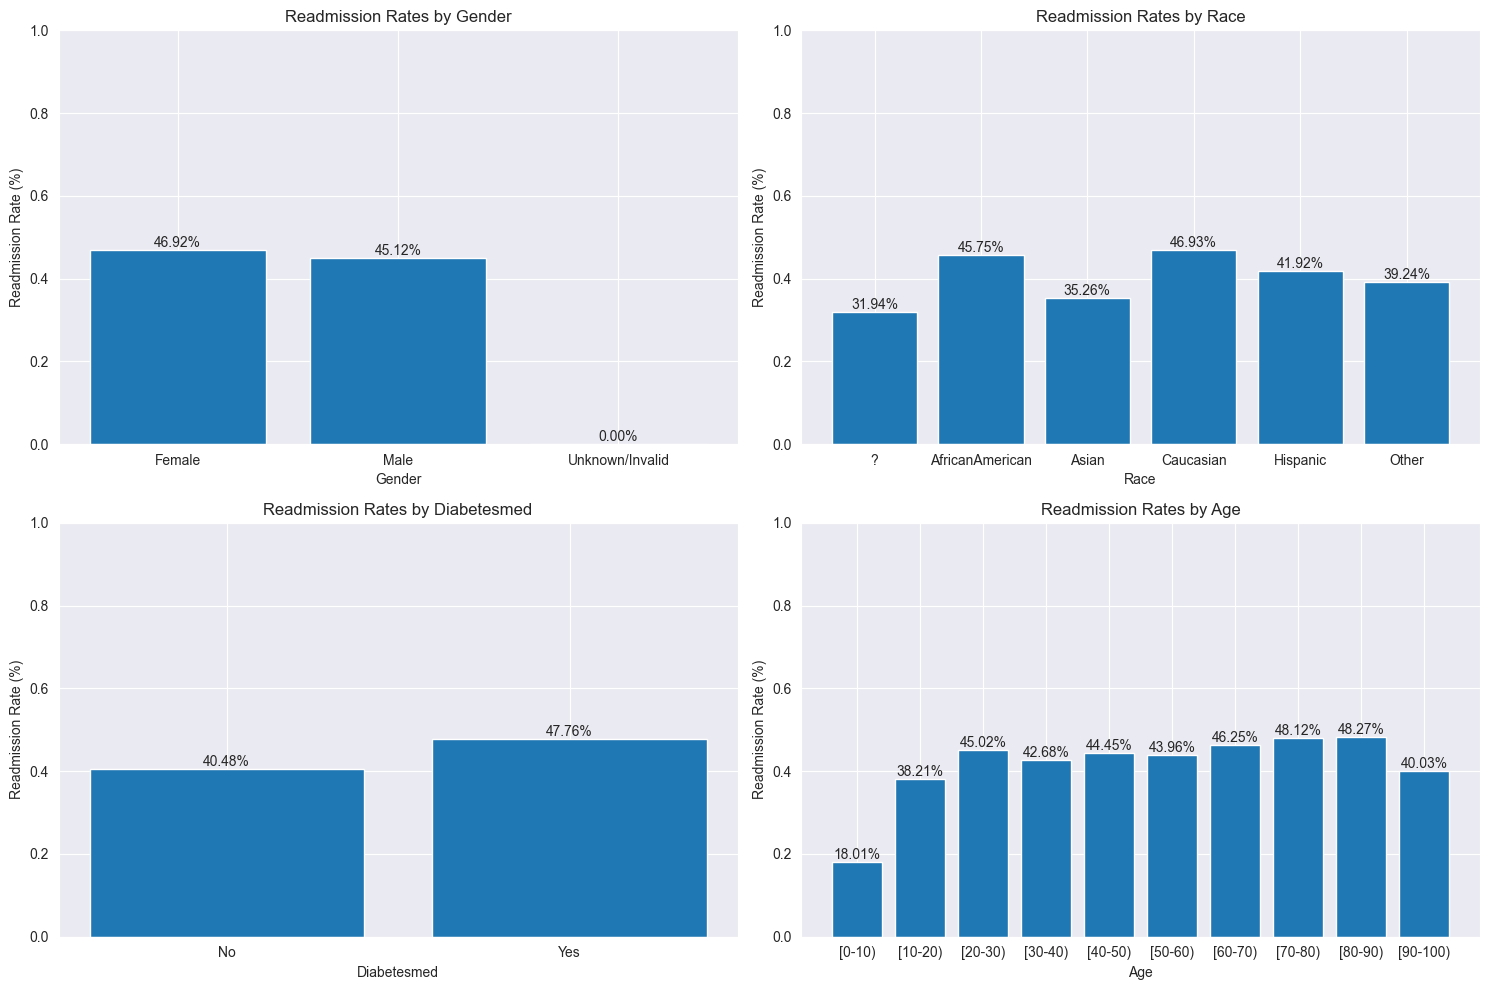

In [11]:
df['readmitted_general'] = np.where(df['readmitted']== 'NO',0,1)
cat_to_plot = ['gender', 'race', 'diabetesMed', 'age']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, cat in enumerate(cat_to_plot):
    # Calculate the mean readmission rate for each category
    category_means = df.groupby(cat)['readmitted_general'].mean()
    # Plotting the bar plot
    axes[i].bar(category_means.index, category_means.values)
    axes[i].set_title(f'Readmission Rates by {cat.title()}')
    axes[i].set_xlabel(cat.title())
    axes[i].set_ylabel('Readmission Rate (%)')
    axes[i].set_ylim(0, 1)
    # Adding percentage labels on each bar
    for index, value in enumerate(category_means.values):
        axes[i].text(index, value, f'{value:.2%}', ha="center", va='bottom')

plt.tight_layout()
plt.show()

## Missing values
This section spots missing values within each feature in order to start thinking about its manipulation strategy

In [12]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
(df == '?').sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Missing values are denoted with the '?' character

## Outliers detection
Here we use boxplots to identify the presence of outliers or not in numerical features. Treatment of outliers and missing values comes in the Data manipulation section

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


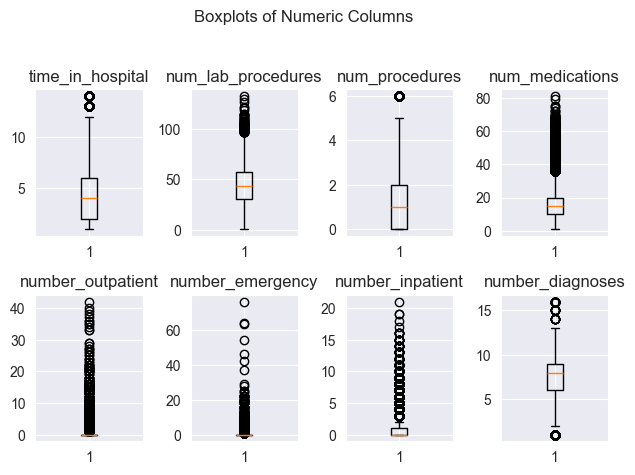

In [14]:
print(num_df.columns)
fig, axes = plt.subplots(2, 4) 

axes_flat = axes.flatten()

for ax, column in zip(axes_flat, num_df.columns):
    ax.boxplot(num_df[column])
    ax.set_title(column)

plt.suptitle('Boxplots of Numeric Columns')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()